In [20]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [34]:

# Read activities from CSV file
csv_file_path = './strava-latest/activities.csv'  # Update with your CSV file path

df = pd.read_csv(csv_file_path)

# Filter only 'Ride' activities and select relevant columns
df = df[df['Activity Type'] == 'Ride'][['Activity Date', 'Average Speed', 'Elevation Gain']]

# Remove rows where average speed is 0
df = df[df['Average Speed'] > 5]
df = df[df['Elevation Gain'] > 5]

# Convert average speed from m/s to km/h
df['Average Speed'] = df['Average Speed'] * 3.6

# Convert Activity Date to datetime and extract year-month for grouping
df['Activity Date'] = pd.to_datetime(df['Activity Date'])
df['YearMonth'] = df['Activity Date'].dt.to_period('M')

/var/folders/8q/5bw1ycfx0qn18y24vc75w37c0000gp/T/ipykernel_28713/2906709513.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Activity Date'] = pd.to_datetime(df['Activity Date'])


In [48]:

# Calculate average speed per month
df_monthly = df.groupby('YearMonth')['Average Speed'].mean().reset_index()

df_monthly['Moving Average'] = df_monthly['Average Speed'].rolling(window=4).mean()



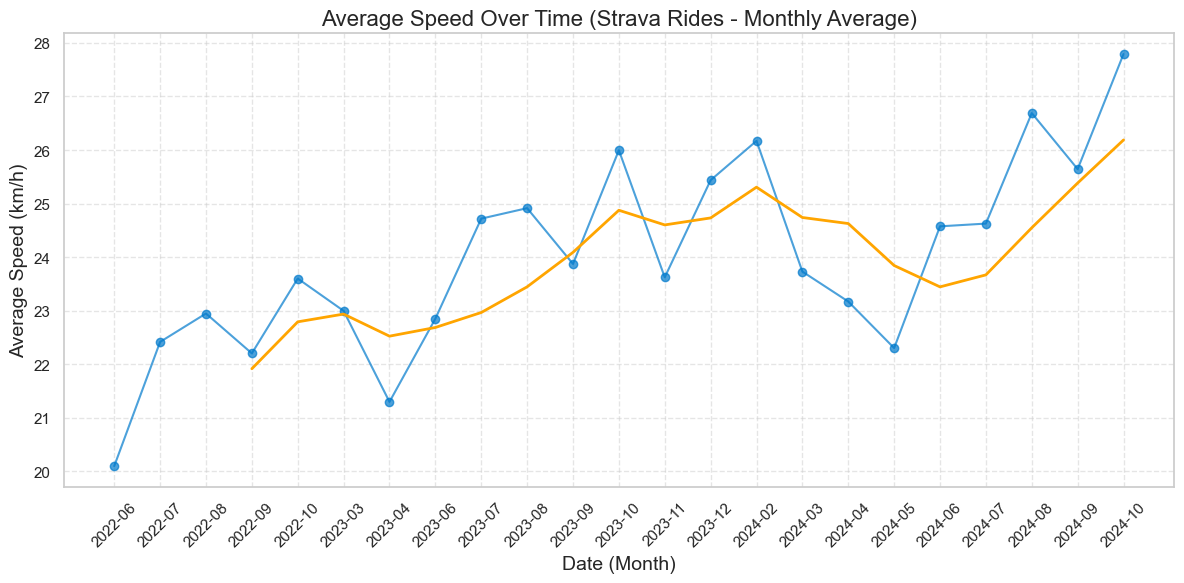

In [49]:
# Set Seaborn style for a cleaner look
sns.set(style='whitegrid')

# Plot the average speed over time (monthly)
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['YearMonth'].astype(str), df_monthly['Average Speed'], marker='o', linestyle='-', color='#007acc', alpha=0.7, label='Monthly Average')
plt.plot(df_monthly['YearMonth'].astype(str), df_monthly['Moving Average'], linestyle='-', color='orange', linewidth=2, label='3-Month Moving Average')
plt.xlabel('Date (Month)', fontsize=14)
plt.ylabel('Average Speed (km/h)', fontsize=14)
plt.title('Average Speed Over Time (Strava Rides - Monthly Average)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', alpha=0.5)

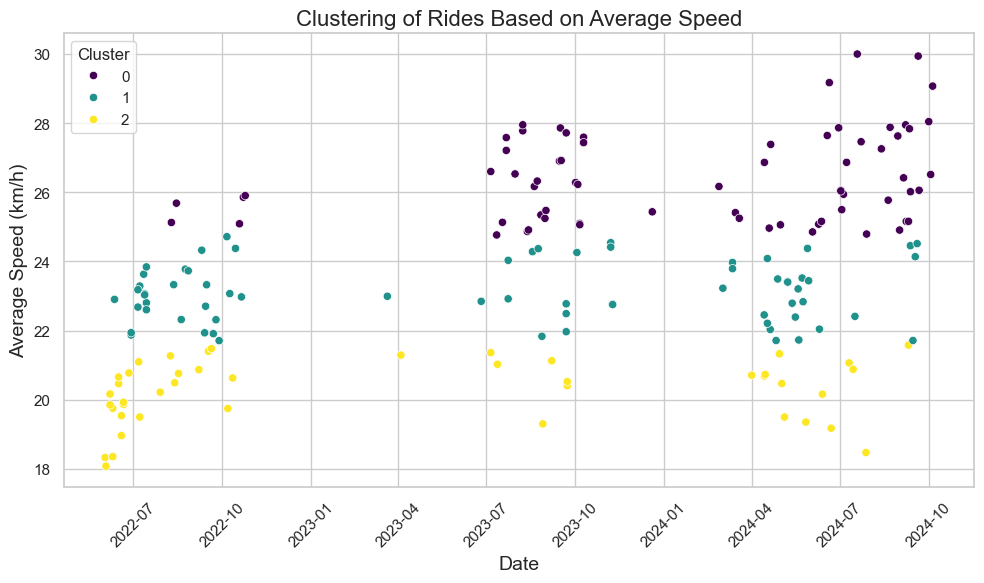

Cluster Analysis Summary:
   Cluster  count       mean       std
0        0     68  26.430789  1.304965
1        1     68  23.085549  0.875927
2        2     45  20.284031  0.925901
Cluster 0:
  Number of Rides: 68
  Average Speed: 26.43 km/h
  Standard Deviation of Speed: 1.30 km/h
Cluster 1:
  Number of Rides: 68
  Average Speed: 23.09 km/h
  Standard Deviation of Speed: 0.88 km/h
Cluster 2:
  Number of Rides: 45
  Average Speed: 20.28 km/h
  Standard Deviation of Speed: 0.93 km/h


In [45]:
def cluster_analysis(df):
    # Prepare data for clustering
    df_cluster = df[['Average Speed']]

    # Use KMeans to create 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df_cluster)

    # Plot the clustering result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Activity Date'], y=df['Average Speed'], hue=df['Cluster'], palette='viridis')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average Speed (km/h)', fontsize=14)
    plt.title('Clustering of Rides Based on Average Speed', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analyze the characteristics of each cluster
    cluster_summary = df.groupby('Cluster')['Average Speed'].agg(['count', 'mean', 'std']).reset_index()
    print("Cluster Analysis Summary:")
    print(cluster_summary)
    for _, row in cluster_summary.iterrows():
        print(f"Cluster {int(row['Cluster'])}:")
        print(f"  Number of Rides: {int(row['count'])}")
        print(f"  Average Speed: {row['mean']:.2f} km/h")
        print(f"  Standard Deviation of Speed: {row['std']:.2f} km/h")

cluster_analysis(df)


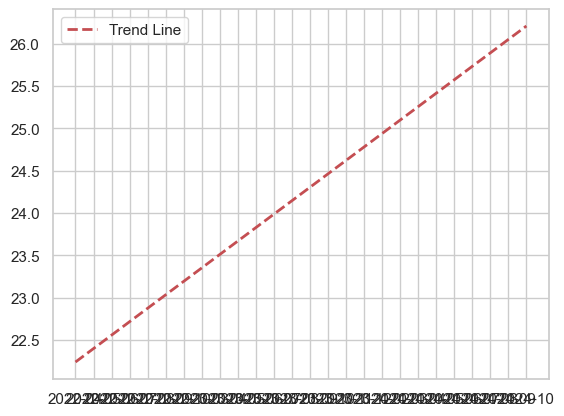

Average speed has increased over time with a slope of 0.16 km/h per month.


In [17]:
# Perform linear regression to analyze trend over time
# Perform linear regression to analyze trend over time (monthly)
numeric_dates = np.arange(len(df_monthly))
slope, intercept, r_value, p_value, std_err = linregress(numeric_dates, df_monthly['Average Speed'])

# Plot regression line
regression_line = intercept + slope * numeric_dates
plt.plot(df_monthly['YearMonth'].astype(str), regression_line, color='r', linestyle='--', linewidth=2, label='Trend Line')
plt.legend()
plt.show()

# Print analysis result
if slope > 0:
    print(f"Average speed has increased over time with a slope of {slope:.2f} km/h per month.")
elif slope < 0:
    print(f"Average speed has decreased over time with a slope of {slope:.2f} km/h per month.")
else:
    print("Average speed has remained consistent over time.")